In [1]:
using WignerSymbols, SphericalHarmonics
using Plots; gr(); theme(:vibrant);
using Printf
using DataFrames
using LinearAlgebra
using Luxor
ENV["COLUMNS"]=200;

# Ligand field theory

In this exercise you will construct a metal complex and compute the splitting of the d-orbitals in the electrostatic field of ligands.

Potential of the ligand field at a point $\mathbf{r}$ is:
<center> $\hat{V}(\mathbf{r}) = \sum\limits_{i=1}^{N_L} \frac{q_i}{|\mathbf{R}_i - \mathbf{r}|}$  </center>


In [2]:
include("./LF_functions.jl");

## Example: Metal-ion in a cubic field
        
Bellow you will find the example use of this notebook demonstrated on a metal ion in a cubic field or equally charge equidistant ligands.

### Creating the complex:
The positions of ligands in spherical coordinates have to be specified in arrays `ligands_θ` and `ligands_ϕ`, we assume that the distance to the metal ion is the same for all the ligands.
    
Geometry of cubic complex is demonstrated bellow:


    

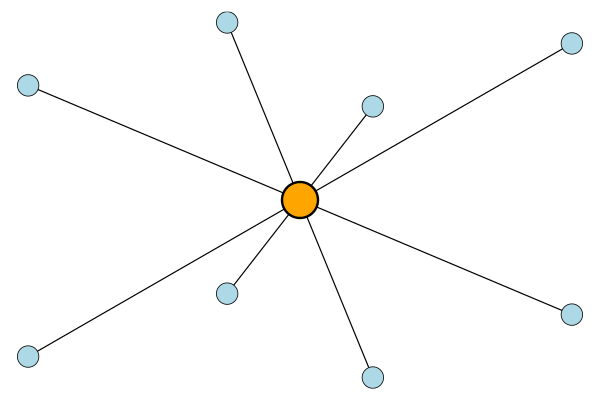

In [3]:
ligands_θ = [ pi/4, pi/4, pi/4, pi/4, pi*3/4, pi*3/4, pi*3/4, pi*3/4 ];
ligands_ϕ = [ pi/4, pi*3/4, pi*5/4, pi*7/4, pi/4, pi*3/4, pi*5/4, pi*7/4  ];
plot_ligs(ligands_θ, ligands_ϕ)

You can save the visualization of the complex with `savefig` function:

In [4]:
savefig("cube.svg")

### Computing the total Hamiltonian in matrix representation
Function `construct_Htot` takes position of ligands as arguments and returns the total Hamiltonian with elements $< d_i | \hat{V} | d_j >$, where $\hat{V}$ represents a Coulomb interaction with all the ligands.

In [5]:
construct_Htot(ligands_θ, ligands_ϕ)

,d₋₂,d₋₁,d₀,d₁,d₂
,String,String,String,String,String
1,+ 8.00 F0 - 0.57 F2 - 0.15 F4,,,,- 0.42 F4
2,,+ 8.00 F0 + 0.29 F2 + 0.62 F4,,,
3,,,+ 8.00 F0 + 0.57 F2 - 0.93 F4,,
4,,,,+ 8.00 F0 + 0.29 F2 + 0.62 F4,
5,- 0.42 F4,,,,+ 8.00 F0 - 0.57 F2 - 0.15 F4


Function `do_splitting` will plot the energy the new energy levels of the d-orbitals. This is done by solving the sekular equations in form:
<center> $ det\left( \mathbf{H}^{tot} - \epsilon\mathbf{I} \right) = 0 $ </center>
The Slater-Condon parameters ($F_0$, $F_2$ and $F_4$) has to be provided.

*Absolute values of Slater-Condon parameters are arbitrary, do not use a large number so the new energies will be within the range of the plot. Parameter $F_0$ should not be larger than 0.3.*

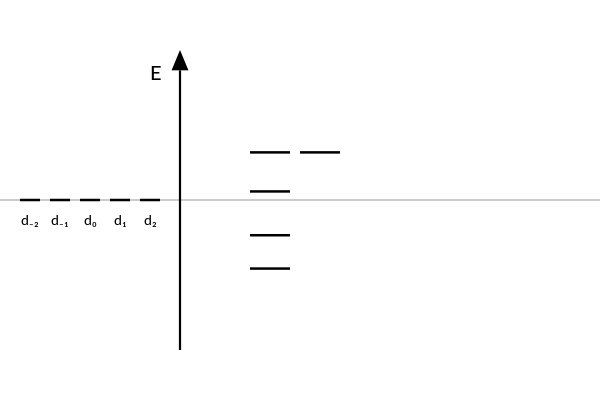

In [6]:
do_splitting(ligands_θ, ligands_ϕ, f0=0, f2=2, f4=1)

## Exercise 1: Optical transitions in [Cr(H$_2$O)$_6$]$^{3+}$
- **Prepare a metal-ion in an octahedral field**
 - Determine the spherical coordinates of ligands in octahedral arrangement.
 - *Hint: Draw the definition of spherical coordinates*
- **Compute total Hamiltonian in matrix representation with d-orbitals as basis**
 - Discuss the meaning of Slater-Condon parameters in the matrix elements.
 - Can you disentagnle the shift of d-orbitals to higher energies and their splitting just from the total Hamiltonian?
 - The total Hamiltonian is computed in the basis of d$_{-2}$, d$_{-1}$, d$_0$, d$_1$ and d$_2$. What is the relation between these orbitals and orbitals d$_{z^2}$, d$_{xz}$, d$_{xy}$, d$_{yz}$ and d$_{x^2-y^2}$? 
- **Explore the effect of symmetry perturbation**
  - Make a small displacements of the ligand position in order to break the octahedral symmetry.
  - Compute again the total Hamiltonian and splitting of the d-orbitals.
  - Compare with the symmetric case and discuss the results.

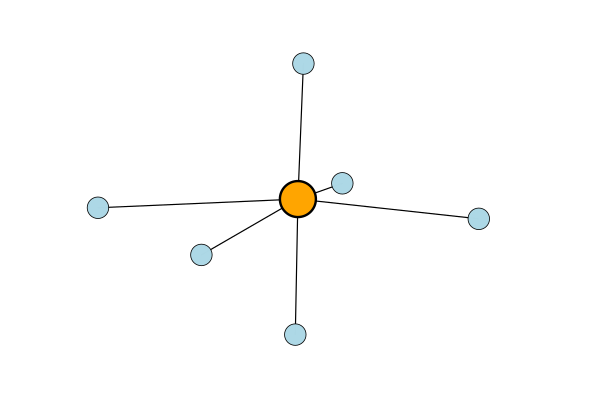

In [7]:
ligands_θ = [ pi/2, pi/2, pi/2, pi/2, 0, pi ] .+ rand(6)/pi;
ligands_ϕ = [ 0, pi/2, pi, 3*pi/2, 0, 0 ] .+ rand(6)/pi;

p = plot_ligs(ligands_θ, ligands_ϕ)

In [8]:
construct_Htot(ligands_θ, ligands_ϕ)

,d₋₂,d₋₁,d₀,d₁,d₂
,String,String,String,String,String
1,+ 6.00 F0 - 0.02 F2 + 0.16 F4,+ 0.03 F2 - 0.01 F4,- 0.00 F2 - 0.02 F4,+ 0.05 F4,+ 0.53 F4
2,+ 0.03 F2 - 0.01 F4,+ 6.00 F0 + 0.01 F2 - 0.63 F4,+ 0.01 F2 + 0.01 F4,- 0.01 F2 + 0.03 F4,- 0.05 F4
3,- 0.00 F2 - 0.02 F4,+ 0.01 F2 + 0.01 F4,+ 6.00 F0 + 0.02 F2 + 0.94 F4,- 0.01 F2 - 0.01 F4,- 0.00 F2 - 0.02 F4
4,+ 0.05 F4,- 0.01 F2 + 0.03 F4,- 0.01 F2 - 0.01 F4,+ 6.00 F0 + 0.01 F2 - 0.63 F4,- 0.03 F2 + 0.01 F4
5,+ 0.53 F4,- 0.05 F4,- 0.00 F2 - 0.02 F4,- 0.03 F2 + 0.01 F4,+ 6.00 F0 - 0.02 F2 + 0.16 F4


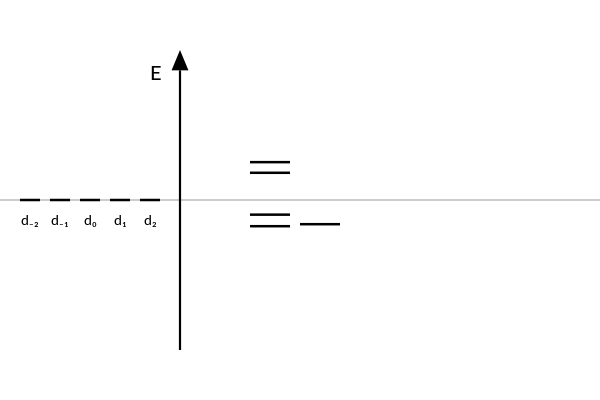

In [9]:
do_splitting(ligands_θ, ligands_ϕ, f0=0, f2=0.2, f4=1)

## Exercise 2: *Ab initio* calculation